In [108]:
import matplotlib.pyplot as plt
import datetime as dt
import missingno as msno
import os
import seaborn as sns
import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim
#%load_ext autotime
import geopandas as gpd
import geopy
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt
import plotly_express as px
import tqdm
from tqdm._tqdm_notebook import tqdm_notebook
import folium
import opencage
from opencage.geocoder import OpenCageGeocode
import pprint
import reverse_geocoder
from warnings import filterwarnings
filterwarnings('ignore')
import googletrans
from googletrans import Translator
import pycountry
from country_list import available_languages
import nltk
nltk.download('words')
from nltk.corpus import words

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Ismat\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [67]:
os.getcwd()
data1=pd.read_csv(r'C:\Users\Ismat\OneDrive\Рабочий стол\document\etc\kurslar\lesson_course\data\hacking_attempts_geodata.csv')
data1

,lat,lng,datetime
0,51.5085,-0.1257,2021-08-21 01:31:46
1,33.7215,73.0433,2021-08-21 01:30:35
2,18.5196,73.8554,2021-08-21 01:30:16
3,22.2783,114.1747,2021-08-21 01:29:35
4,48.1031,29.1260,2021-08-21 01:27:16
...,...,...,...
52513,52.3740,4.8897,2022-07-13 11:44:26
52514,36.3631,127.3729,2022-07-13 11:46:27
52515,10.8230,106.6296,2022-07-13 11:48:25
52516,36.3216,127.4193,2022-07-13 12:14:35


In [68]:
data1.shape

(52518, 3)

<AxesSubplot:>

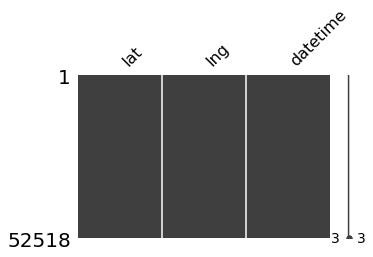

In [4]:
msno.matrix(data1,figsize=(5,3))

In [5]:
data1.dtypes

lat         float64
lng         float64
datetime     object
dtype: object

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52518 entries, 0 to 52517
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lat       52518 non-null  float64
 1   lng       52518 non-null  float64
 2   datetime  52518 non-null  object 
dtypes: float64(2), object(1)
memory usage: 1.2+ MB


In [7]:
data1[data1.duplicated(keep=False)].head(5)

,lat,lng,datetime
441,39.9075,116.3972,2021-08-15 17:52:24
442,39.9075,116.3972,2021-08-15 17:52:24
10467,16.0678,108.2208,2021-08-28 17:20:33
10468,16.0678,108.2208,2021-08-28 17:20:33
17608,39.9075,116.3972,2021-09-10 10:51:30


In [69]:
data1 = data1.drop_duplicates(keep='first')

In [70]:
# Null values
data1.isna().sum()

lat         0
lng         0
datetime    0
dtype: int64

In [71]:
#changing to date
data1['datetime'] = pd.to_datetime(data1['datetime'])
data1.dtypes

lat                float64
lng                float64
datetime    datetime64[ns]
dtype: object

In [72]:
## hour
data1['hours']=data1['datetime'].dt.hour
#### Weekday with number
data1['Weekday'] = data1['datetime'].dt.weekday
# adding one  day for seven day week
data1['Weekday']=data1['Weekday']+1
#data1=data1.drop(labels='Weekday_name',axis=1)
## year
data1['Year'] = data1['datetime'].dt.year
#### Day of year
data1['Day_of_Year'] = data1['datetime'].dt.dayofyear
#### Month with number
data1['Month'] = data1['datetime'].dt.month
#### Month with name
data1['Month_name'] = data1['datetime'].dt.month_name()
#### Difference from today
data1['Day_difference'] = pd.datetime.today() - data1['datetime']

In [73]:
data1.head()

,lat,lng,datetime,hours,Weekday,Year,Day_of_Year,Month,Month_name,Day_difference
0,51.5085,-0.1257,2021-08-21 01:31:46,1,6,2021,233,8,August,385 days 21:19:35.161709
1,33.7215,73.0433,2021-08-21 01:30:35,1,6,2021,233,8,August,385 days 21:20:46.161709
2,18.5196,73.8554,2021-08-21 01:30:16,1,6,2021,233,8,August,385 days 21:21:05.161709
3,22.2783,114.1747,2021-08-21 01:29:35,1,6,2021,233,8,August,385 days 21:21:46.161709
4,48.1031,29.1260,2021-08-21 01:27:16,1,6,2021,233,8,August,385 days 21:24:05.161709


In [74]:
data1.groupby(['lat','lng']).size().sort_values(ascending=False)

lat      lng      
39.9075   116.3972    4215
22.2783   114.1747    2553
1.3215    103.6957    1889
52.3740   4.8897      1786
40.8043  -74.0000     1661
                      ... 
18.9554  -99.0000        1
38.8276  -91.0000        1
38.8339  -104.0000       1
38.8404  -77.0000        1
41.7814  -87.0000        1
Length: 4055, dtype: int64

In [75]:
data1.max()

lat                                65.0124
lng                               177.5103
datetime               2022-07-13 12:21:33
hours                                   23
Weekday                                  7
Year                                  2022
Day_of_Year                            365
Month                                   12
Month_name                       September
Day_difference    391 days 22:47:17.161709
dtype: object

In [15]:
data1.min()

lat                                0.0389
lng                                -159.0
datetime              2021-08-15 00:04:04
hours                                   0
Weekday                                 1
Year                                 2021
Day_of_Year                             1
Month                                   1
Month_name                          April
Day_difference    59 days 08:54:07.063837
dtype: object

In [133]:
data_last

,lat,lng,datetime,hours,Weekday,Year,Day_of_Year,Month,Month_name,Day_difference,address
0,51.5085,-0.1257,2021-08-21 01:31:46,1,6,2021,233,8,August,385 days 21:19:35.161709,"Jigsaw, 449, Strand, St Clement Danes, Covent ..."
1,33.7215,73.0433,2021-08-21 01:30:35,1,6,2021,233,8,August,385 days 21:20:46.161709,"Embassy of Brazil, Ismail Zabeeh Road, ای-8, ا..."
2,18.5196,73.8554,2021-08-21 01:30:16,1,6,2021,233,8,August,385 days 21:21:05.161709,"शनिवार वाडा, शिवाजी रस्ता, Kasba Peth, Pune Ci..."
3,22.2783,114.1747,2021-08-21 01:29:35,1,6,2021,233,8,August,385 days 21:21:46.161709,"駱克道 Lockhart Road, 灣仔北 Wan Chai North, 灣仔 Wan ..."
4,48.1031,29.1260,2021-08-21 01:27:16,1,6,2021,233,8,August,385 days 21:24:05.161709,"Соборна вулиця, Кодима, Кодимська міська грома..."
...,...,...,...,...,...,...,...,...,...,...,...
52487,52.3740,4.8897,2022-07-13 11:44:26,11,3,2022,194,7,July,59 days 11:06:55.161709,"Grachtengordel van Amsterdam, De Ruijterkade, ..."
52488,36.3631,127.3729,2022-07-13 11:46:27,11,3,2022,194,7,July,59 days 11:04:54.161709,"성천초등학교, 갈마역로, 월평2동, 월평동, 서구, 대전, 35211, 대한민국"
52489,10.8230,106.6296,2022-07-13 11:48:25,11,3,2022,194,7,July,59 days 11:02:56.161709,"Trường Chinh, Phường Tây Thạnh, Quận Tân Phú, ..."
52490,36.3216,127.4193,2022-07-13 12:14:35,12,3,2022,194,7,July,59 days 10:36:46.161709,"성모초등학교.여고등학교, 충무로15번길, 대흥동, 중구, 대전, 34917, 대한민국"


<AxesSubplot:>

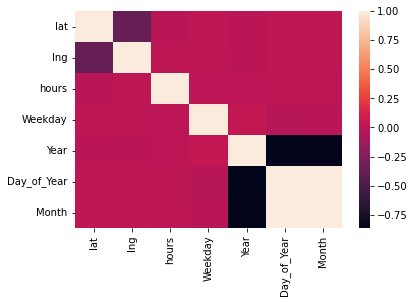

In [171]:
sns.heatmap(data_last.corr())

<AxesSubplot:xlabel='Month', ylabel='count'>

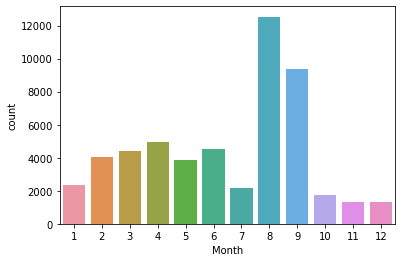

In [76]:
# ayliq aktivlik
sns.countplot(data1['Month'])

<AxesSubplot:xlabel='hours', ylabel='count'>

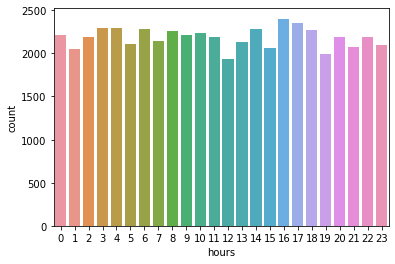

In [77]:
# saatliq aktivlik
sns.countplot(data1['hours'])

<AxesSubplot:xlabel='Weekday', ylabel='count'>

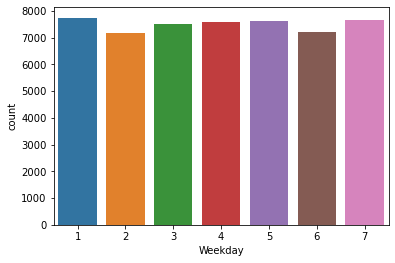

In [18]:
# heftelik aktivlik
sns.countplot(data1['Weekday'])

In [19]:
month_values = {}

In [20]:
for x in range(12):
    month_values[x + 1] = np.sum(list(filter(lambda value : value == (x + 1), data1['datetime'].dt.month.values)))

Text(0, 0.5, 'Sum of attack attemps')

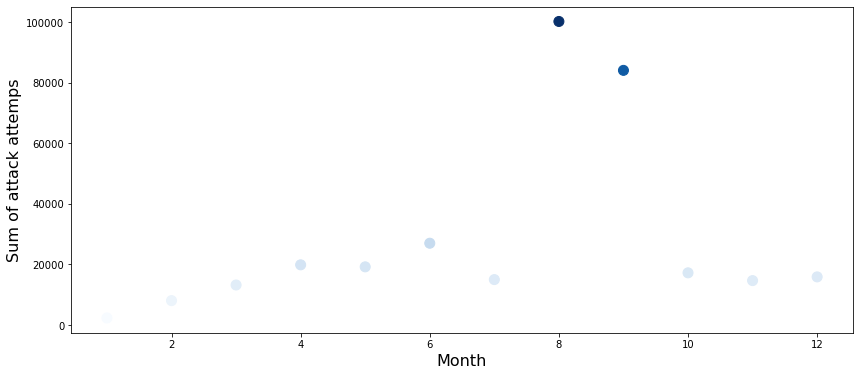

In [21]:
#  illik aktivlik
plt.figure(figsize = (14, 6))
plt.scatter(list(month_values), month_values.values(), c = list(month_values.values()), cmap = 'Blues', s = 100)
plt.xlabel('Month', size = 16)
plt.ylabel('Sum of attack attemps', size = 16)

In [22]:
day_values = {}

In [78]:
for x in range(31):
    day_values[x + 1] = np.sum(list(filter(lambda value : value == (x + 1), data1['datetime'].dt.day.values)))

Text(0, 0.5, 'Sum of attack attemps')

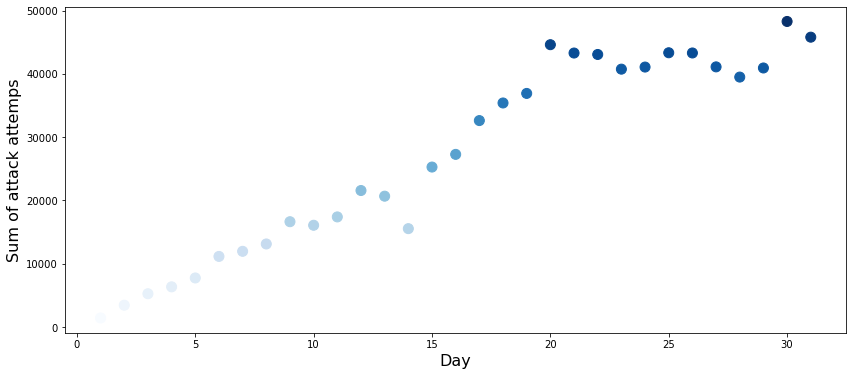

In [79]:
#ayliq aktivlik
plt.figure(figsize = (14, 6))
plt.scatter(list(day_values), day_values.values(), c = list(day_values.values()), cmap = 'Blues', s = 100)
plt.xlabel('Day', size = 16)
plt.ylabel('Sum of attack attemps', size = 16)

In [80]:
X = data1.iloc[:, :-1].values

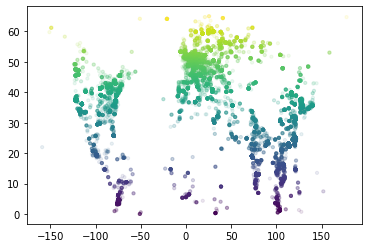

In [81]:
plt.scatter(X[:, 1], X[:, 0], alpha = 0.1, c = X[:, 0], s = 10)

In [82]:
data1

,lat,lng,datetime,hours,Weekday,Year,Day_of_Year,Month,Month_name,Day_difference
0,51.5085,-0.1257,2021-08-21 01:31:46,1,6,2021,233,8,August,385 days 21:19:35.161709
1,33.7215,73.0433,2021-08-21 01:30:35,1,6,2021,233,8,August,385 days 21:20:46.161709
2,18.5196,73.8554,2021-08-21 01:30:16,1,6,2021,233,8,August,385 days 21:21:05.161709
3,22.2783,114.1747,2021-08-21 01:29:35,1,6,2021,233,8,August,385 days 21:21:46.161709
4,48.1031,29.1260,2021-08-21 01:27:16,1,6,2021,233,8,August,385 days 21:24:05.161709
...,...,...,...,...,...,...,...,...,...,...
52513,52.3740,4.8897,2022-07-13 11:44:26,11,3,2022,194,7,July,59 days 11:06:55.161709
52514,36.3631,127.3729,2022-07-13 11:46:27,11,3,2022,194,7,July,59 days 11:04:54.161709
52515,10.8230,106.6296,2022-07-13 11:48:25,11,3,2022,194,7,July,59 days 11:02:56.161709
52516,36.3216,127.4193,2022-07-13 12:14:35,12,3,2022,194,7,July,59 days 10:36:46.161709


In [83]:
s=data1[['lat','lng']].drop_duplicates()

count=data1[['lat','lng']].value_counts()
d = data1[['lat','lng']].value_counts().reset_index(name='counts')
first_10=d[['lat','lng']].head(10)

In [48]:
%%time
import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.point import Point
geolocator = Nominatim(user_agent="test")
df=d[['lat','lng']]
def reverse_geocoding(lat, lon):
    try:
        location = geolocator.reverse(Point(lat, lon))
        return location.raw['display_name']
    except:
        return None

df['address'] = np.vectorize(reverse_geocoding)(df['lat'], df['lng'])



Wall time: 35min 19s


In [50]:
addresnother method
import reverse_geocoder as rg
import pprint
 
def reverseGeocode(coordinates):
    result = rg.search(coordinates)
     
    # result is a list containing ordered dictionary.
    pprint.pprint(result)
 
 # Driver function
if __name__=="__main__":
     
    # Coordinates tuple.Can contain more than one pair.
    coordinates =(1.3215,114.1747)
     
    reverseGeocode(coordinates)

[{'admin1': 'North Kalimantan',
  'admin2': '',
  'cc': 'ID',
  'lat': '1.78931',
  'lon': '114.9013',
  'name': 'Longnawang'}]


In [56]:
address=df

In [85]:
data1

,lat,lng,datetime,hours,Weekday,Year,Day_of_Year,Month,Month_name,Day_difference
0,51.5085,-0.1257,2021-08-21 01:31:46,1,6,2021,233,8,August,385 days 21:19:35.161709
1,33.7215,73.0433,2021-08-21 01:30:35,1,6,2021,233,8,August,385 days 21:20:46.161709
2,18.5196,73.8554,2021-08-21 01:30:16,1,6,2021,233,8,August,385 days 21:21:05.161709
3,22.2783,114.1747,2021-08-21 01:29:35,1,6,2021,233,8,August,385 days 21:21:46.161709
4,48.1031,29.1260,2021-08-21 01:27:16,1,6,2021,233,8,August,385 days 21:24:05.161709
...,...,...,...,...,...,...,...,...,...,...
52513,52.3740,4.8897,2022-07-13 11:44:26,11,3,2022,194,7,July,59 days 11:06:55.161709
52514,36.3631,127.3729,2022-07-13 11:46:27,11,3,2022,194,7,July,59 days 11:04:54.161709
52515,10.8230,106.6296,2022-07-13 11:48:25,11,3,2022,194,7,July,59 days 11:02:56.161709
52516,36.3216,127.4193,2022-07-13 12:14:35,12,3,2022,194,7,July,59 days 10:36:46.161709


In [64]:
addres[address['lat']==18.5196]

,lat,lng,address
50,18.5196,73.8554,"शनिवार वाडा, शिवाजी रस्ता, Kasba Peth, Pune Ci..."


In [88]:
data_2=pd.merge(data1,addres, on=['lat', 'lng'],how='left')
data_last=data_2

In [43]:
#data_last.to_excel('output1.xlsx', engine='xlsxwriter')

In [30]:
data_last=pd.read_excel(r'C:\Users\Ismat\OneDrive\Рабочий стол\projects\analytics\atacks.xlsx')
data_last

,lat,lng,datetime,hours,Weekday,Year,Day_of_Year,Month,Month_name,Day_difference,address
0,51.5085,-0.1257,2021-08-21 01:31:46,1,6,2021,233,8,August,385.888601,"Jigsaw, 449, Strand, St Clement Danes, Covent ..."
1,33.7215,73.0433,2021-08-21 01:30:35,1,6,2021,233,8,August,385.889423,"Embassy of Brazil, Ismail Zabeeh Road, ای-8, ا..."
2,18.5196,73.8554,2021-08-21 01:30:16,1,6,2021,233,8,August,385.889643,"शनिवार वाडा, शिवाजी रस्ता, Kasba Peth, Pune Ci..."
3,22.2783,114.1747,2021-08-21 01:29:35,1,6,2021,233,8,August,385.890118,"駱克道 Lockhart Road, 灣仔北 Wan Chai North, 灣仔 Wan ..."
4,48.1031,29.1260,2021-08-21 01:27:16,1,6,2021,233,8,August,385.891726,"Соборна вулиця, Кодима, Кодимська міська грома..."
...,...,...,...,...,...,...,...,...,...,...,...
52487,52.3740,4.8897,2022-07-13 11:44:26,11,3,2022,194,7,July,59.463138,"Grachtengordel van Amsterdam, De Ruijterkade, ..."
52488,36.3631,127.3729,2022-07-13 11:46:27,11,3,2022,194,7,July,59.461738,"성천초등학교, 갈마역로, 월평2동, 월평동, 서구, 대전, 35211, 대한민국"
52489,10.8230,106.6296,2022-07-13 11:48:25,11,3,2022,194,7,July,59.460372,"Trường Chinh, Phường Tây Thạnh, Quận Tân Phú, ..."
52490,36.3216,127.4193,2022-07-13 12:14:35,12,3,2022,194,7,July,59.442201,"성모초등학교.여고등학교, 충무로15번길, 대흥동, 중구, 대전, 34917, 대한민국"


In [98]:
j=data_last

In [66]:
adres=data_last['address']
#j=adres.str.translate(j)

In [99]:
a

,0,1,2,3,4,5,6,7,8,9,10,11
0,Jigsaw,449,Strand,St Clement Danes,Covent Garden,City of Westminster,London,Greater London,England,WC2R 0QU,United Kingdom,None
1,Embassy of Brazil,Ismail Zabeeh Road,ای-8,اسلام آباد,وفاقی دارالحکومت اسلام آباد,44000,پاکستان,None,None,None,None,None
2,शनिवार वाडा,शिवाजी रस्ता,Kasba Peth,Pune City,Pune,Maharashtra,411002,India,None,None,None,None
3,駱克道 Lockhart Road,灣仔北 Wan Chai North,灣仔 Wan Chai,灣仔區 Wan Chai District,香港島 Hong Kong Island,香港 Hong Kong,中国,None,None,None,None,None
4,Соборна вулиця,Кодима,Кодимська міська громада,Подільський район,Одеська область,66000,Україна,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
52487,Grachtengordel van Amsterdam,De Ruijterkade,Oosterdokseiland,Nieuwmarkt/Lastage,Centrum,Amsterdam,Noord-Holland,Nederland,1011 AC,Nederland,None,None
52488,성천초등학교,갈마역로,월평2동,월평동,서구,대전,35211,대한민국,None,None,None,None
52489,Trường Chinh,Phường Tây Thạnh,Quận Tân Phú,Thành phố Hồ Chí Minh,71509,Việt Nam,None,None,None,None,None,None
52490,성모초등학교.여고등학교,충무로15번길,대흥동,중구,대전,34917,대한민국,None,None,None,None,None


<AxesSubplot:xlabel='country'>

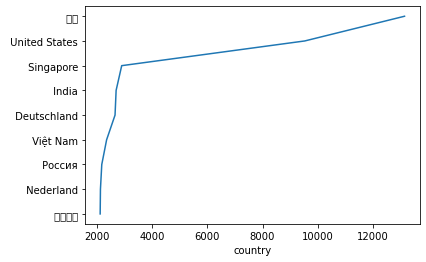

In [118]:


j['country'] = [x.split(",")[-1] for x in j['address']]
g=j['country'].value_counts().head(9)
sns.lineplot(y=g.index,x=g,data=g)

In [147]:
def isEnglish(s):
  return s.isascii()

print(isEnglish("Test"))
print(isEnglish("_1991_اف_جي2"))

True
False


In [169]:
j['isEnglish']=j['address'].apply(isEnglish)
#j['country'][j['isEnglish']==True].value_counts()
j

,lat,lng,datetime,hours,Weekday,Year,Day_of_Year,Month,Month_name,Day_difference,address,country,isEnglish
0,51.5085,-0.1257,2021-08-21 01:31:46,1,6,2021,233,8,August,385.888601,"Jigsaw, 449, Strand, St Clement Danes, Covent ...",United Kingdom,True
1,33.7215,73.0433,2021-08-21 01:30:35,1,6,2021,233,8,August,385.889423,"Embassy of Brazil, Ismail Zabeeh Road, ای-8, ا...",پاکستان,False
2,18.5196,73.8554,2021-08-21 01:30:16,1,6,2021,233,8,August,385.889643,"शनिवार वाडा, शिवाजी रस्ता, Kasba Peth, Pune Ci...",India,False
3,22.2783,114.1747,2021-08-21 01:29:35,1,6,2021,233,8,August,385.890118,"駱克道 Lockhart Road, 灣仔北 Wan Chai North, 灣仔 Wan ...",中国,False
4,48.1031,29.126,2021-08-21 01:27:16,1,6,2021,233,8,August,385.891726,"Соборна вулиця, Кодима, Кодимська міська грома...",Україна,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52487,52.374,4.8897,2022-07-13 11:44:26,11,3,2022,194,7,July,59.463138,"Grachtengordel van Amsterdam, De Ruijterkade, ...",Nederland,True
52488,36.3631,127.3729,2022-07-13 11:46:27,11,3,2022,194,7,July,59.461738,"성천초등학교, 갈마역로, 월평2동, 월평동, 서구, 대전, 35211, 대한민국",대한민국,False
52489,10.823,106.6296,2022-07-13 11:48:25,11,3,2022,194,7,July,59.460372,"Trường Chinh, Phường Tây Thạnh, Quận Tân Phú, ...",Việt Nam,False
52490,36.3216,127.4193,2022-07-13 12:14:35,12,3,2022,194,7,July,59.442201,"성모초등학교.여고등학교, 충무로15번길, 대흥동, 중구, 대전, 34917, 대한민국",대한민국,False
